In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import torch as t
import numpy as np

In [18]:
x0 = t.tensor(1.0, requires_grad=True)

x1 = t.tensor(-1.0, requires_grad=True)

x2 = t.tensor(2.0, requires_grad=True)

x3 = t.tensor(2.0, requires_grad=True)

w0 = t.tensor(-5.0, requires_grad=True)

In [14]:
y0 = x0 + x1 
print("y0:", y0)

y1 = x2 + x3 
print("y1:", y1)

y2 = y0 * y1 
print("y2:", y2)

y3 = t.exp(y2)
print("y3:", y3)

y4 = t.max(y3,w0)
print("y4:", y4)

y5 = -1 * y4
print("y5:", y5)

y6 = 1/y5
print("y6:", y6)

y0: tensor(0., grad_fn=<AddBackward0>)
y1: tensor(4., grad_fn=<AddBackward0>)
y2: tensor(0., grad_fn=<MulBackward0>)
y3: tensor(1., grad_fn=<ExpBackward>)
y4: tensor(1., grad_fn=<MaximumBackward>)
y5: tensor(-1., grad_fn=<MulBackward0>)
y6: tensor(-1., grad_fn=<MulBackward0>)


In [15]:
y6.backward()

In [17]:
print()
print('Gradients for all leaf nodes:')
print('-----------------------------')
for node, nodename in zip(leaf_nodes, leaf_nodes_name):
    print(nodename, ":")
    print(node)
    print("Gradient:", node.grad)
    print()


Gradients for all leaf nodes:
-----------------------------
x_0 :
tensor(1., requires_grad=True)
Gradient: tensor(4.)

x_1 :
tensor(-1., requires_grad=True)
Gradient: tensor(4.)

x_2 :
tensor(2., requires_grad=True)
Gradient: tensor(0.)

x_3 :
tensor(2., requires_grad=True)
Gradient: tensor(0.)

w_0 :
tensor(-5., requires_grad=True)
Gradient: tensor(0.)



### Task

Berechnen Sie die partiellen Ableitungen $ \frac{\partial out}{\partial x_0} $, $ \frac{\partial out}{\partial x_1} $, $ \frac{\partial out}{\partial x_2} $, $ \frac{\partial out}{\partial x_3} $, $ \frac{\partial out}{\partial w_0} $ zu folgendem gebenen 'Computational Graph':

### Function
\
<font size="5">
$out(x_0,x_1,x_2,x_3,w_0) = \frac{1}{-1*max(\exp((x_0+x_1)*(x_2+x_3)),w_0)}$
</font>

### Computational Graph for Task

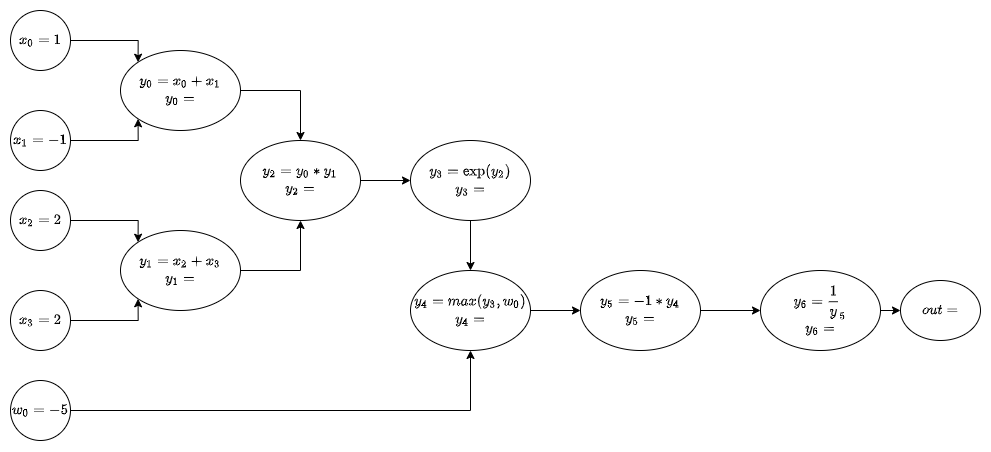

In [2]:
x_0 = t.tensor(1.0, requires_grad=True)
x_1 = t.tensor(-1.0, requires_grad=True)
x_2 = t.tensor(2.0, requires_grad=True)
x_3 = t.tensor(2.0, requires_grad=True)
w_0 = t.tensor(-5.0, requires_grad=True)

leaf_nodes = [x_0,x_1,x_2,x_3,w_0]
leaf_nodes_name = ['x_0','x_1','x_2','x_3','w_0']

In [3]:
out = -1*( 1/((t.max (t.exp( (x_0+x_1)*(x_2+x_3) ), w_0) )) ) 
print(out)

tensor(-1., grad_fn=<MulBackward0>)


In [4]:
out.backward()

### Computational Graph Solution

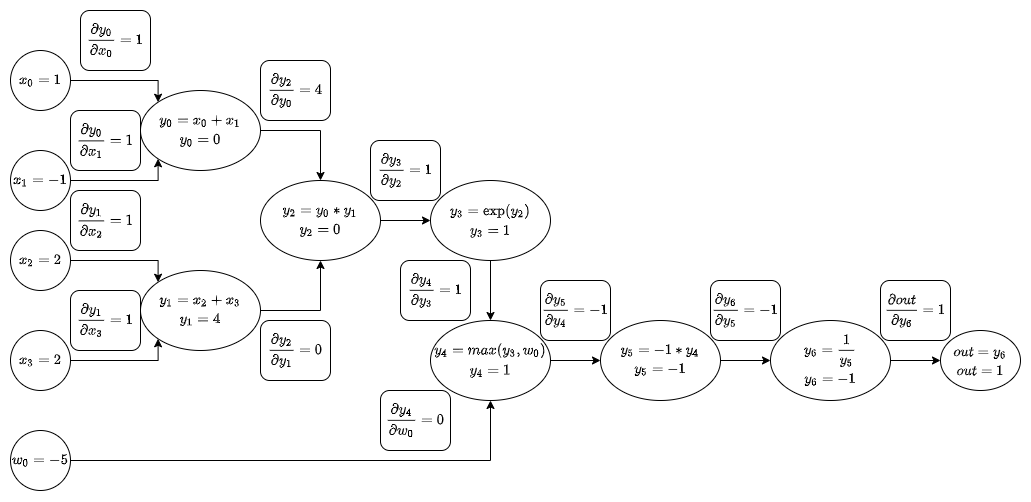

<font size="5">
Using chain rule:

\
$\frac{\partial out}{\partial x_0} = \frac{\partial out}{\partial y_6}*\frac{\partial y_6}{\partial y_5}*\frac{\partial y_5}{\partial y_4}*\frac{\partial y_4}{\partial y_3}*\frac{\partial y_3}{\partial y_2} *\frac{\partial y_2}{\partial y_0} *\frac{\partial y_0}{\partial x_0} \\
\frac{\partial out}{\partial x_0} = 1*(-1)*(-1)*1*1*4*1 = 4$

\
$\frac{\partial out}{\partial x_1} = \frac{\partial out}{\partial y_6}*\frac{\partial y_6}{\partial y_5}*\frac{\partial y_5}{\partial y_4}*\frac{\partial y_4}{\partial y_3}*\frac{\partial y_3}{\partial y_2} *\frac{\partial y_2}{\partial y_0} *\frac{\partial y_0}{\partial x_1} \\
\frac{\partial out}{\partial x_1} = 1*(-1)*(-1)*1*1*4*1 = 4$

\
$\frac{\partial out}{\partial x_2} = \frac{\partial out}{\partial y_6}*\frac{\partial y_6}{\partial y_5}*\frac{\partial y_5}{\partial y_4}*\frac{\partial y_4}{\partial y_3}*\frac{\partial y_3}{\partial y_2} *\frac{\partial y_2}{\partial y_1} *\frac{\partial y_1}{\partial x_2} \\
\frac{\partial out}{\partial x_2} = 1*(-1)*(-1)*1*1*0*1 = 0$

\
$\frac{\partial out}{\partial x_3} = \frac{\partial out}{\partial y_6}*\frac{\partial y_6}{\partial y_5}*\frac{\partial y_5}{\partial y_4}*\frac{\partial y_4}{\partial y_3}*\frac{\partial y_3}{\partial y_2} *\frac{\partial y_2}{\partial y_1} *\frac{\partial y_1}{\partial x_3} \\
\frac{\partial out}{\partial x_3} = 1*(-1)*(-1)*1*1*0*1 = 0$

\
$\frac{\partial out}{\partial w_0} = \frac{\partial out}{\partial y_6}*\frac{\partial y_6}{\partial y_5}*\frac{\partial y_5}{\partial y_4}*\frac{\partial y_4}{\partial w_0} \\
\frac{\partial out}{\partial w_0} = 1*(-1)*(-1)*0 = 0$


</font>


In [5]:
print()
print('Gradients for all leaf nodes:')
print('-----------------------------')
for node, nodename in zip(leaf_nodes, leaf_nodes_name):
    print(nodename,':')
    print(node)
    print('Gradient:',node.grad)
    print()


Gradients for all leaf nodes:
-----------------------------
x_0 :
tensor(1., requires_grad=True)
Gradient: tensor(4.)

x_1 :
tensor(-1., requires_grad=True)
Gradient: tensor(4.)

x_2 :
tensor(2., requires_grad=True)
Gradient: tensor(0.)

x_3 :
tensor(2., requires_grad=True)
Gradient: tensor(0.)

w_0 :
tensor(-5., requires_grad=True)
Gradient: tensor(0.)



**Notes**

In [ ]:
'''
Steps:
    1. Put each entries from computational graph into function:
        x0 = t.tensor(1.0, requires_grad=True)
        t.tensor --> tensor with no autograd history "leaf tensor"
        requires_grad=True --> Is True if gradients need to be computed for this Tensor, False otherwise.
        
    2. Compute function from inwards to outwards.
        


'''Steps:
    1. Put each entries from computational graph into function:
        #x0 = t.tensor(1.0, requires_grad=True)
        #t.tensor --> tensor with no autograd history "leaf tensor"
        #requires_grad=True --> Is True if gradients need to be computed for this Tensor, False otherwise.
    2. Compute function fr
        

